(u_seuil)=
# Complément : Détermination de la tension seuil
On explique ici la méthode utilisée pour déterminer la tension seuil. Il ne s'agit pas forcément de la méthode la plus efficace mais elle donne des résultats relativement corrects et est assez simple à expliquer.

## Principe
Le principe de la méthode est similaire à la méthode des moindres carrés :
1. On choisit une valeur de $U_d$ arbitraire. On a alors une caractéristique modèle $(i=0; u \leq U_D); (i\geq 0; u=U_D)$
2. On calcule pour chaque point de mesure la distance $d_i$ entre chaque point de mesure $(u_i, i_i)$ et la caractéristique modèle. Cette dernière étant composée de deux demi-droite ($i=0$ et $u=U_D$), il s'agit de calculer pour chaque point le minimum entre les deux distances à ces deux droites soit $d_i = \min(abs(i_i), abs(u_i-U_D))$
3. On somme toutes les distances au carré pour obtenir une grandeur dépendant du jeu de donnée et de la valeur $U_D$ choisie : $\Gamma_{exp}(U_D) = \sum_i d_i^2$.
4. On réalise ce calcul pour un grand nombre de valeur de $U_D$ dans un intervalle où on pense que la tension seuil se situe.
5. On détermine le minimum de cette fonction : la valeur de $U_D$ correspondante sera l'estimation de la tension seuil.

## Implémentation
L'implémentation est donnée ci-dessous avec un exemple avec un jeu de données expérimentales.

In [1]:
""" On importe pour vous les bibliothèques scientifiques utiles."""
import numpy as np
import matplotlib.pyplot as plt

# On a mesuré des valeurs fluctuantes donc on rentre les vecteurs correspondant aux valeurs extrêmes
# Il serviront à calculer les valeurs mesurées et incertitudes.
umax = np.array([-10.77, -6.871, -0.8418, 0.6576, 0.7396, 0.7822, 0.8683, 0.8179, 0.8613])  # Valeurs de tensions
umin = np.array([-10.769, -6.87, -0.8414, 0.6575, 0.7394, 0.7816, 0.8683, 0.8177, 0.8608])  # Valeurs de tensions
imax = np.array([0, 0, 0, 2.243, 8.28, 14.349, 35.485, 21.513, 33.134])  # Valeurs d'intensité
imin = np.array([0.001, 0.001, 0.002, 2.244, 8.281, 14.352, 35.487, 21.515, 33.137, ])  # Valeurs d'intensité

u = (umax + umin) / 2  # Valeurs de tensions
i = (imax + imin) / 2  # Valeurs d'intensité

uu = (umax - umin) / 2  # Incertitudes sur les tensions (ce sera un vecteur numpy)
ui = (imax - imin) / 2  # Incertitudes sur les intensités (ce sera un vecteur numpy)


def eval_ud(u, i, ud_min, ud_max):
    """Fonction qui évalue la tension seuil la plus adaptée au tracé expérimental
    u : Vecteur contenu les mesures de tension
    i : Vecteur contenu les mesures d'intensité
    ud_min, ud_max : Flottant délimitant l'intervalle dans lequel on recherche UD

    Renvoie : un flottant correspondant à la valeur de ud optimale
    """
    N = 1000  # Nombre de valeur de ud qui seront testée entre 0 et 1 V
    n = len(u)
    ud = np.linspace(ud_min, ud_max, N)  # Valeurs de ud testées
    dud = np.zeros(N)  # On stocke l'estimateur qui permettra de décider quelle valeur de ud est la meilleure
    for k in range(N):  # Calcul de l'estimateur
        ds = 0
        for j in range(n):
            d = min(abs(u[j]-ud[k]), i[j])
            ds = ds + d ** 2
        dud[k] = ds
    return ud[np.argmin(dud)]

print(eval_ud(u, i, 0, 1))  # A titre d'exemple


0.7877877877877878


## Améliorations possibles
On peut imaginer deux améliorations :
* Cette méthode ne tient pas compte des incertitudes. On pourrait facilement en tenir compte avec une simulations de Monte-Carlo. Il suffirait de créer N fois un jeu de données à partir des estimations de $u, i, u(i), u(u)$, d'estimer à chaque fois la tension seuil associée. Les données statistiques moyenne et écart-type donnerait la valeur mesurée et l'incertitude-type.
* La recherche du minimum n'est pas optimale. On pourrait imaginer des méthodes plus efficaces basée sur un calcul de la dérivée numérique de $\Gamma(U_D)$ puis une recherche de 0 pour cette fonction.

A défaut, on donne ci-dessous le tracé de $\Gamma(U_D)$

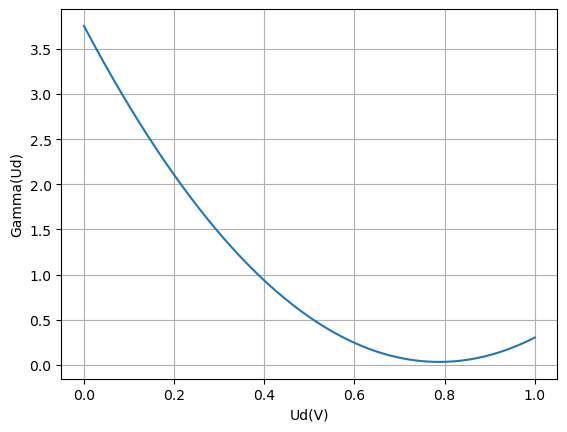

In [2]:
def gamma_ud(u, i, ud):
    n = len(u)
    ds = 0
    for j in range(n):
        d = min(abs(u[j]-ud), i[j])
        ds = ds + d ** 2
    return ds

ud_test = np.linspace(0, 1, 1000)
gamma_test = np.array([gamma_ud(u, i, x) for x in ud_test])

f, ax =  plt.subplots()
ax.set_xlabel("Ud(V)")
ax.set_ylabel("Gamma(Ud)")
ax.plot(ud_test, gamma_test)
ax.grid()
plt.show()